# **Project-Title: Credit Card User Segmentation for XYZ Bank** 🏧

## 1. Problem Definition:
> This case require to develop a customer segmentation to give recommendations like: saving plans, loans, wealth management on the basis of there characteristics and make the predictions with segmented data

## 2. Data Informations:
The data is sourced from github profile:

Link: [https://github.com/pik1989/MarketSegmentation?tab=readme-ov-file]


## 3. Exploratory Data Analysis (EDA)

#### Importing all the libraries

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

#### Importing data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Wahaj's Working Bench/Market-Segmentation-Project/Project-data/Customer Data.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Since the our data contains some missing/null values there is two choices weather we drop it or fill with mean value

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df.shape

(8950, 18)

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Since the Cust_ID column is not so important we'll drop it

In [9]:
df_exp = df.copy()

In [10]:
df_exp.drop("CUST_ID",axis=1,inplace=True)

In [11]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


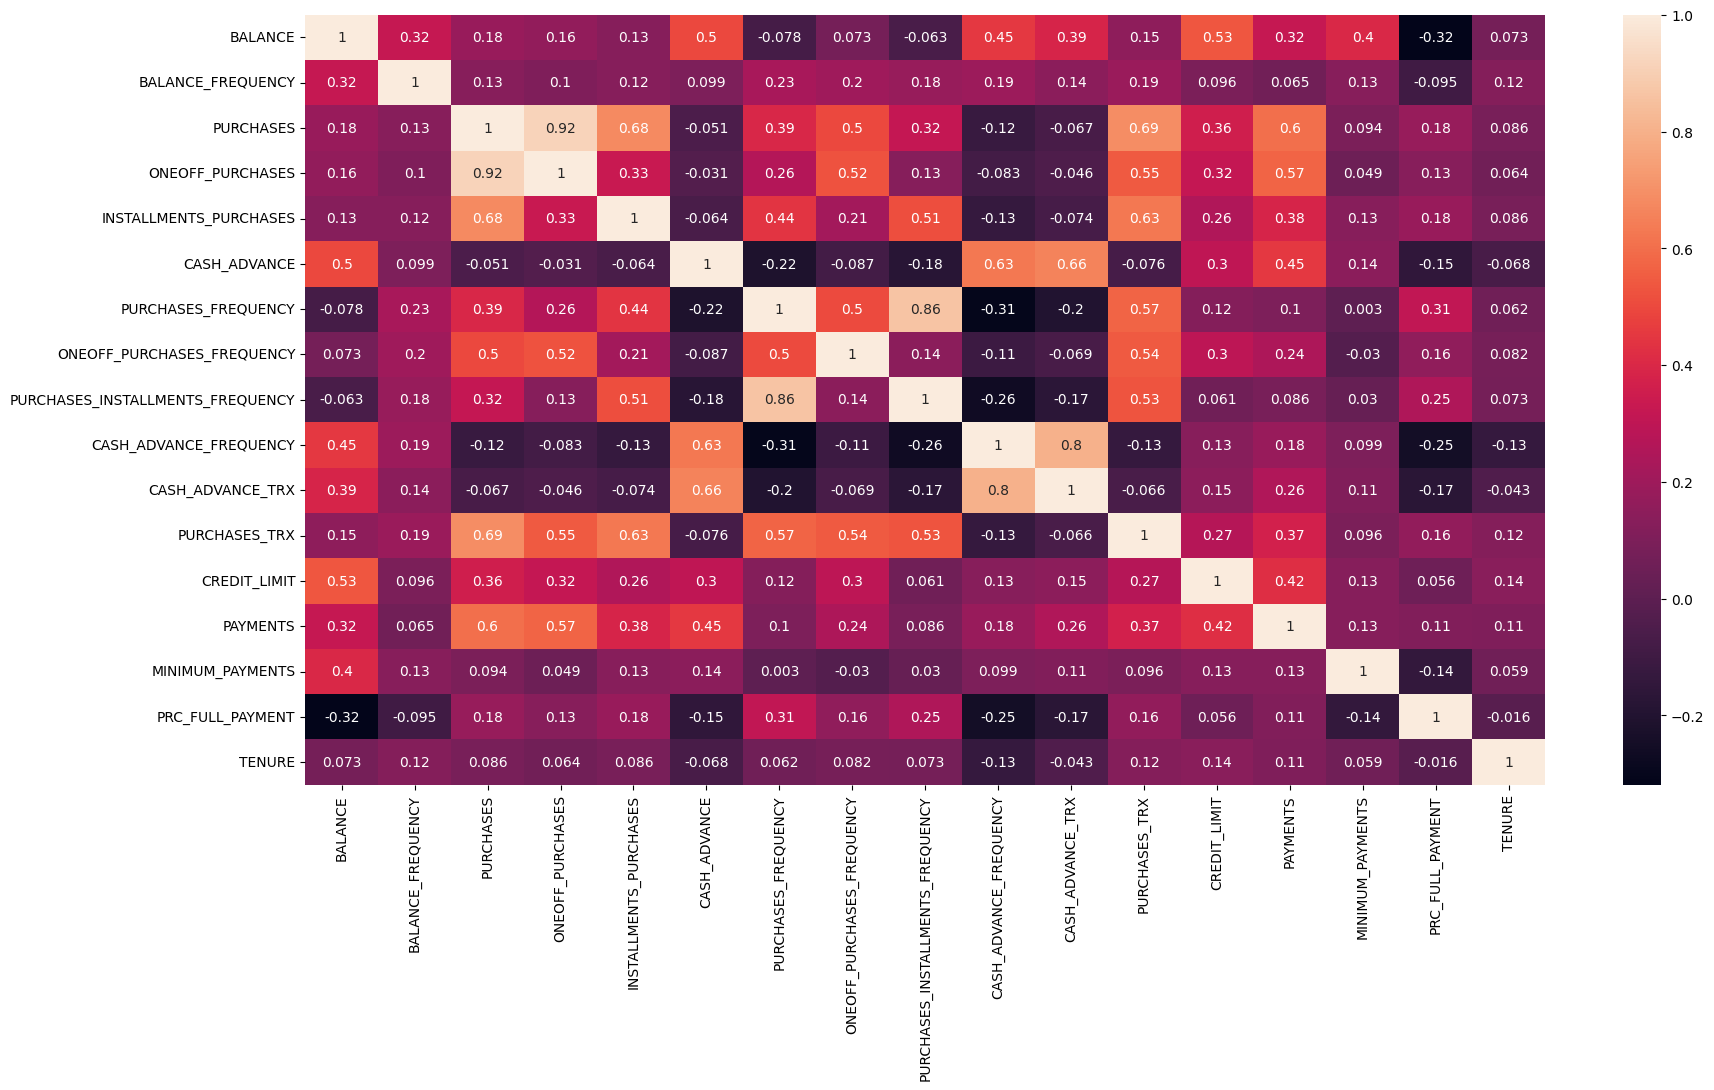

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df_exp.corr(),annot=True)
plt.show()

We'll plot those features which are highly correlated

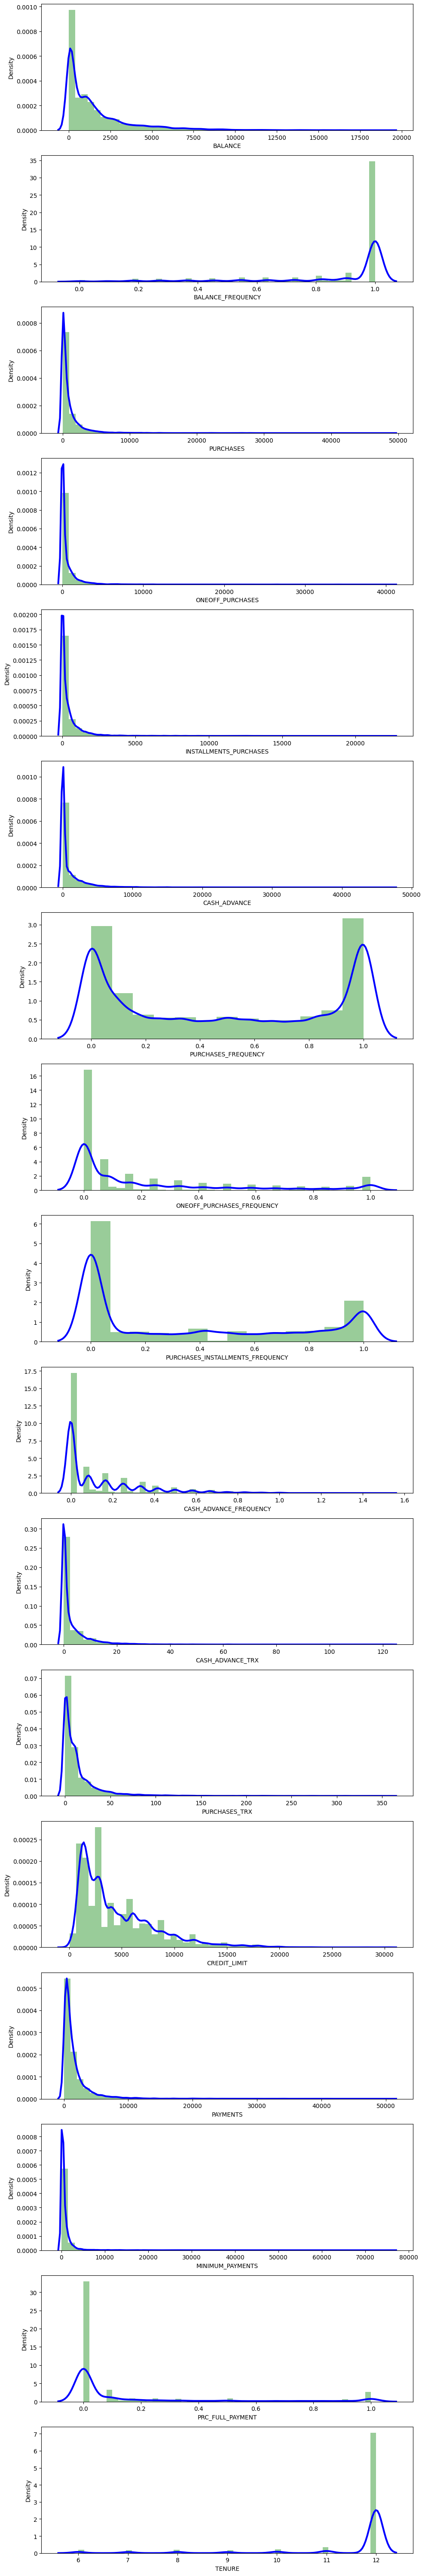

In [13]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,60))
for i in range (len(df_exp.columns)):
  plt.subplot(len(df_exp.columns),1,i+1)
  sns.distplot(df_exp[df_exp.columns[i]],kde_kws={"color":"blue","bw":0.1,"lw":3,"label":"KDE"},hist_kws={"color":'green'})
  plt.tight_layout()
plt.show();

#### Filling the missing values

In [14]:
df_exp.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
df_exp["MINIMUM_PAYMENTS"].fillna(df_exp["MINIMUM_PAYMENTS"].mean(),inplace=True)
df_exp["CREDIT_LIMIT"].fillna(df_exp["CREDIT_LIMIT"].mean(),inplace=True)

In [16]:
df_exp.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Since our data is preprocessed

##4. Feature Scaling

In [17]:
scale = StandardScaler()
df_exp_scaled = scale.fit_transform(df_exp)

In [18]:
df_exp_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

we have to reduce the dimensionality of the data

In [19]:
df_exp.shape

(8950, 17)

we can plot 17 features at once so we'll reduce its dimension to 2D to make it easy to visualize

In [20]:
pca = PCA(n_components=2)
featured_df = pca.fit_transform(df_exp_scaled)

In [21]:
featured_df.shape

(8950, 2)

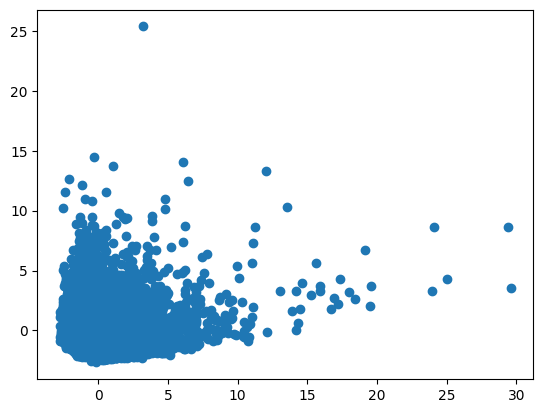

In [22]:
plt.scatter(featured_df[:,0],featured_df[:,1]);

### It's Time to find the value of `K` means number of cluster

#### Manual method `elbow-method`

In [23]:
np.random.seed(42)
wcss = []
for i in range(1,11):
  kmean = KMeans(n_clusters=i)
  model = kmean.fit(featured_df)
  wcss.append(model.inertia_)

In [24]:
wcss[:10]

[72411.2714344717,
 49658.23108893934,
 33017.24702307272,
 24524.17896178954,
 19455.647153946793,
 16213.881589968069,
 13800.106927434097,
 12310.82391637009,
 10912.546179018798,
 9883.755849213616]

since we get the value of WCSS (Within-Cluster Sum of Square) now we can plot it

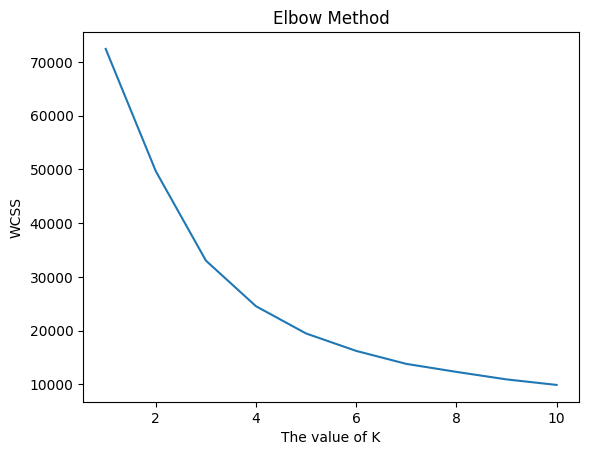

In [25]:
plt.plot(range(1,11),wcss)
plt.xlabel("The value of K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show();

Since above you can see the slight curve is at approx. k=4 or 5

#### Automatice method to find the value of `k`

In [26]:
!pip install kneed
from kneed import KneeLocator
kl_new = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k_value = kl_new.elbow

In [27]:
k_value

4

So the value of k should be 4

##5. Modeling and Fitting

### K-means

In [28]:
Kmean_model = KMeans(n_clusters=4)
Kmean_model.fit(featured_df)

KMeans(n_clusters=4)

#### Getting labels

In [29]:
y_labels_kmean = Kmean_model.predict(featured_df)

#### Ploting

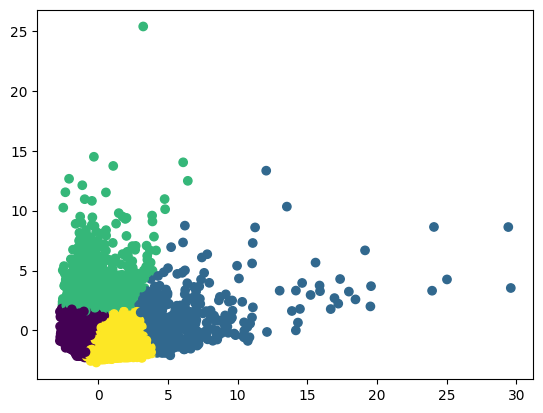

In [30]:
plt.scatter(featured_df[:,0],featured_df[:,1],c=y_labels_kmean)
plt.show();

since here you can see how beautifully our data is clustered

##6. Evaluating using Silhoutte score

In [31]:
score = silhouette_score(featured_df,y_labels_kmean)
score

0.4076676841093317

the model's score is

### DBSCAN

In [32]:
db_model = DBSCAN(eps=0.5)
db_model.fit(featured_df)

DBSCAN()

In [33]:
y_db_labels = db_model.labels_

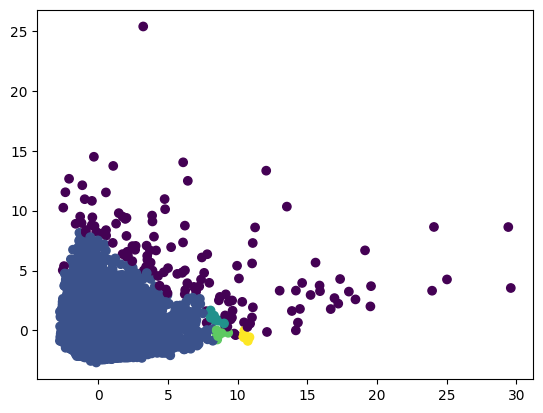

In [34]:
plt.scatter(featured_df[:,0],featured_df[:,1],c=y_db_labels)
plt.show();

In [35]:
db_score = silhouette_score(featured_df,y_db_labels)
db_score

0.6267528707073287

#### Hyperparameter tuning on DB-Scan

In [ ]:
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def silhouette_scorer(estimator=db_model, X=featured_df):
    clusters = estimator.fit_predict(X)
    return silhouette_score(X, clusters)

param_grid = {"eps": np.arange(0.1, 5, 0.1),
              "min_samples": np.arange(3, 30, 3)}

grid_search = GridSearchCV(db_model,
                           param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring=make_scorer(silhouette_scorer),
                           verbose=1)

grid_search.fit(featured_df)  # For unsupervised, no labels needed

Fitting 5 folds for each of 441 candidates, totalling 2205 fits


GridSearchCV(cv=5, estimator=DBSCAN(), n_jobs=-1,
             param_grid={'eps': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'min_samples': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27])},
             scoring=make_scorer(silhouette_scorer), verbose=1)

In [ ]:
grid_search.best_params_

{'eps': 0.1, 'min_samples': 3}

In [36]:
db_final_model = DBSCAN(eps=1.0, min_samples=3)
db_y_labels = db_final_model.fit_predict(featured_df)
final_score = silhouette_score(featured_df, db_y_labels)
final_score

0.7863804456643074

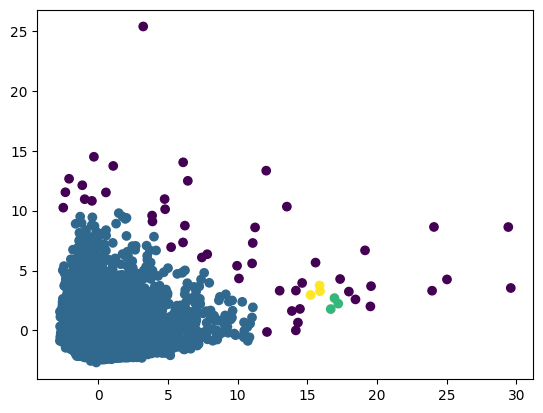

In [37]:
plt.scatter(featured_df[:,0],featured_df[:,1],c=db_y_labels,cmap="viridis")
plt.show();

#### Finding the best parameters and best score

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range for eps and min_samples
eps_range = np.arange(0.5, 2.0, 0.1)
min_samples_range = range(2, 10)

best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_range:
    for min_samples in min_samples_range:
        db_model = DBSCAN(eps=eps, min_samples=min_samples)
        db_y_labels = db_model.fit_predict(featured_df)

        # Check if the number of clusters is greater than 1 for valid silhouette score
        if len(set(db_y_labels)) > 1:
            score = silhouette_score(featured_df, db_y_labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: {best_params}")

Best silhouette score: 0.8060638310029624
Best parameters: {'eps': 1.6999999999999997, 'min_samples': 9}


In [ ]:
db_final_model = DBSCAN(eps=1.69, min_samples=9)
db_y_labels = db_final_model.fit_predict(featured_df)
final_score = silhouette_score(featured_df, db_y_labels)
final_score

0.8060638310029624

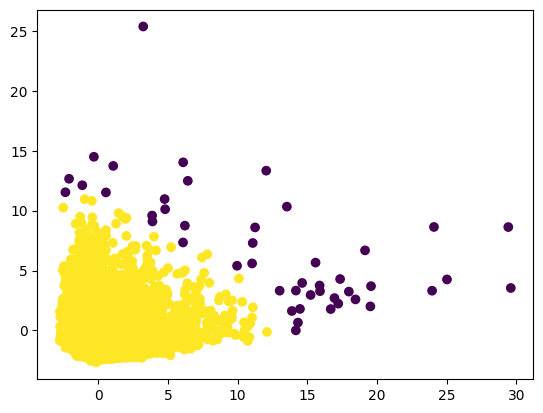

In [ ]:
plt.scatter(featured_df[:,0],featured_df[:,1],c=db_y_labels,cmap="viridis")
plt.show();

## Check KMeans Hyperparameters tuning

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range for k (number of clusters)
k_range = range(2, 20)

best_score = -1
best_k = None

for k in k_range:
    # Fit the KMeans model with current k
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans_model.fit_predict(featured_df)

    # Calculate the silhouette score for the current clustering
    score = silhouette_score(featured_df, kmeans_labels)

    # Update best_score and best_k if the current score is higher
    if score > best_score:
        best_score = score
        best_k = k

# Print the best silhouette score and corresponding number of clusters
print(f"Best silhouette score: {best_score}")
print(f"Best number of clusters (k): {best_k}")

Best silhouette score: 0.46475586513342354
Best number of clusters (k): 2


NO....! The Kmeans is not best for this task so We'll go with DBSCAN

## Converting the Unsupervised Learning to Supervised Learning Problem

The reason why we have to predict the future the customer nature

In [ ]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Nature,Cluster,New
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0,2


In [ ]:
df_exp.drop(["Cluster Nature","Cluster","New"],axis=1 ,inplace=True)

In [ ]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Adding the Predict the Cluster

In [ ]:
# Transform labels: -1 to 0 and non-negative labels to 1
db_y_labels_transformed = np.where(db_y_labels == -1, 0, 1)

In [ ]:
df_exp["Cluster_Number"] = db_y_labels_transformed

In [ ]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Number
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
df_exp.Cluster_Number.value_counts()

Cluster_Number
1    8904
0      46
Name: count, dtype: int64

Since there are lot of customers belonging to cluster 1

In [ ]:
# Add noise to the dataset
def add_noise(data, noise_level=0.05):
    n_samples, n_features = data.shape
    noise = np.random.randn(int(n_samples * noise_level), n_features)
    return np.vstack([data, noise])

# Define the range for eps and min_samples
eps_range = np.arange(0.5, 2.0, 0.1)
min_samples_range = range(2, 10)

best_score = -1
best_params = {'eps': None, 'min_samples': None, 'algorithm': None}

# Add noise to the data
noisy_featured_df = add_noise(featured_df, noise_level=0.1)

for eps in eps_range:
    for min_samples in min_samples_range:
        for algorithm in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            db_model_new = DBSCAN(eps=eps, min_samples=min_samples, algorithm=algorithm)
            db_y_labels_new = db_model_new.fit_predict(noisy_featured_df)

            # Check if the number of clusters is greater than 1 for a valid silhouette score
            if len(set(db_y_labels_new)) > 1:
                score = silhouette_score(noisy_featured_df, db_y_labels_new)
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples, 'algorithm': algorithm}

print(f"Best silhouette score: {best_score}")
print(f"Best parameters: {best_params}")

Best silhouette score: 0.8125915431903629
Best parameters: {'eps': 1.6999999999999997, 'min_samples': 9, 'algorithm': 'auto'}


In [38]:
db_final_model = DBSCAN(eps=1.69, min_samples=9, algorithm='auto')
db_y_labels = db_final_model.fit_predict(featured_df)

In [39]:
db_y_labels_transformed_new = np.where(db_y_labels == -1, 0, 1)
df_exp["New_cluster"] = db_y_labels_transformed_new

In [40]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,New_cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


## Big Problem.....! (KMeans vs. DBSCAN)

Here we're dealing with a big problem about choosing a right model, a model with high score or a model with greater number of clusters, yes you got it,it is battel between KMeans and DBSCAN which model should we use....!

* If we go with objective, where it is mentioned that Market segmentation to give recommendations like: saving plans, loans and wealth management etc. they (bank) wants to diversed their customers in different number of clusters So that they will get them better recommendations. Moreover I think so the DBscan clustering model making our dataset highly imbalance which is not good, So you're absolutely right we'll go with KMeans


<Axes: xlabel='Cluster_Number'>

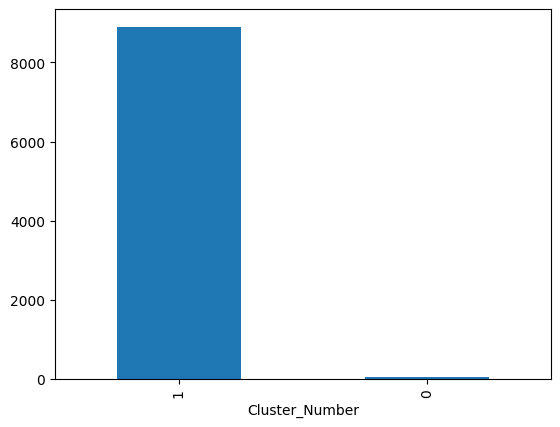

In [ ]:
df_exp.Cluster_Number.value_counts().plot.bar()

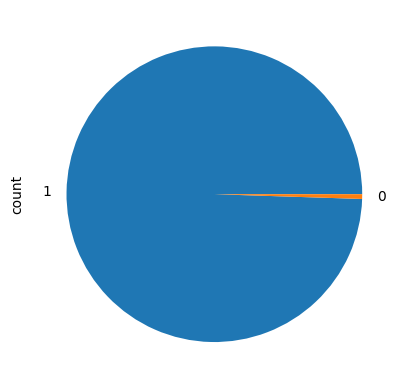

In [41]:
df_exp.New_cluster.value_counts().plot.pie();

#### Dataset is becoming Highly imbalance

In [42]:
df_exp.New_cluster.value_counts()

New_cluster
1    8904
0      46
Name: count, dtype: int64

## Setting up the Final Model

In [47]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,New_cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [48]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(featured_df)

KMeans(n_clusters=4)

In [50]:
y_lables_kmean = kmeans_model.labels_

In [51]:
y_labels_kmean[:10]

array([0, 2, 3, 0, 0, 3, 1, 3, 0, 0], dtype=int32)

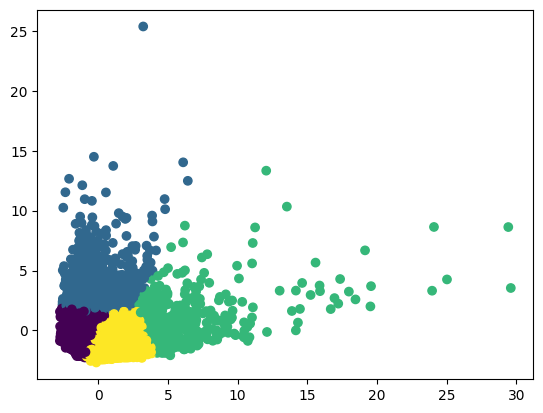

In [91]:
plt.scatter(featured_df[:,0],featured_df[:,1],c=y_lables_kmean)
plt.show();

In [52]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,New_cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [54]:
df_exp.drop("New_cluster",axis=1,inplace=True)

Converting the Unsupervised to Supervised Problem

In [55]:
df_exp["Cluster_number"] = y_lables_kmean

In [56]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_number
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [58]:
df_exp.Cluster_number.value_counts()

Cluster_number
0    3918
3    3285
1    1244
2     503
Name: count, dtype: int64

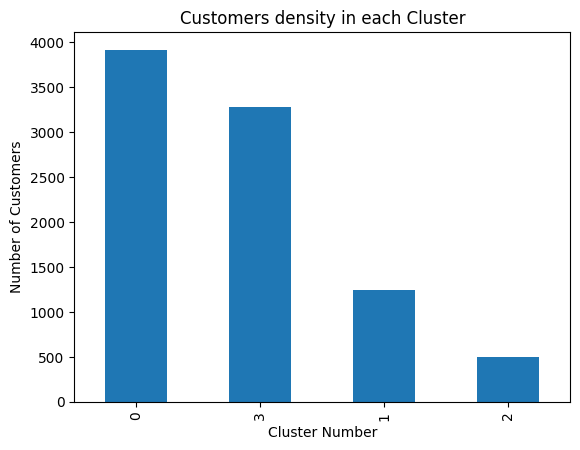

In [62]:
df_exp.Cluster_number.value_counts().plot.bar();
plt.xlabel("Cluster Number")
plt.ylabel("Number of Customers")
plt.title("Customers density in each Cluster")
plt.show();

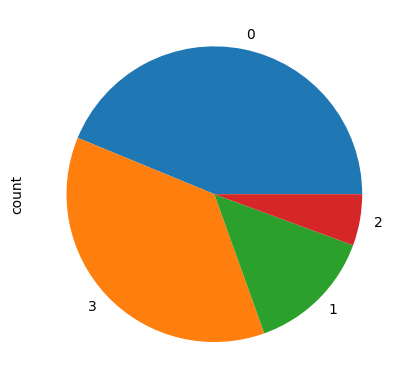

In [60]:
df_exp.Cluster_number.value_counts().plot.pie();

## Spliting the data into Train, Test and Split

In [63]:
df_exp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_number
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [64]:
X = df_exp.drop("Cluster_number",axis=1)
y = df_exp.Cluster_number

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7160, 17), (1790, 17), (7160,), (1790,))

Since the problem is turned to classification problem

## Evaluation

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

dict = {"RandomForestCLassifier":RandomForestClassifier(),
        "LogisticRegression":LogisticRegression(),
        "KNeighboursClassifier": KNeighborsClassifier()}

In [69]:
for label,items in dict.items():
  model = items
  model.fit(X_train,y_train)
  score = model.score(X_test,y_test)
  print(f"The score of {label} is {score}")

The score of RandomForestCLassifier is 0.9547486033519553
The score of LogisticRegression is 0.8245810055865922
The score of KNeighboursClassifier is 0.8089385474860336


The RandomForestCLassifier is doing very well So we'll go with this model

In [70]:
np.random.seed(42)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
y_preds = model.predict(X_test)
y_preds[:10]

array([0, 0, 3, 3, 3, 0, 1, 3, 3, 1], dtype=int32)

In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [81]:
print(f"accuracy_score is : {accuracy_score(y_test,y_preds)}")
print(f"The recall score is: {recall_score(y_test,y_preds,average='weighted')}")
print(f"The precision score is: {precision_score(y_test,y_preds,average='weighted')}")
print(f"The f1_score is: {f1_score(y_test,y_preds,average='weighted')}")

accuracy_score is : 0.952513966480447
The recall score is: 0.952513966480447
The precision score is: 0.9523779923134066
The f1_score is: 0.9521318517730435


In [83]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       787
           1       0.91      0.92      0.91       238
           2       0.93      0.80      0.86       107
           3       0.96      0.96      0.96       658

    accuracy                           0.95      1790
   macro avg       0.94      0.92      0.93      1790
weighted avg       0.95      0.95      0.95      1790



## Predicting with our own parameters

In [90]:
import numpy as np

custom_data = [930.794744, 0.817182, 1992.18, 492.18, 0, 0, 0.25, 0.25, 0, 0, 0, 9, 7000, 605.618627, 145.549069, 0 ,0.13]

# Reshape custom_data to 2D array
custom_data_reshaped = np.array(custom_data).reshape(1, -1)

# Transform the custom data
custom_data_scale = scale.transform(custom_data_reshaped)

# Predict using the model
custom_preds = model.predict(custom_data_scale)

print(f"Custom data belongs to custer number :{custom_preds}")

Custom data belongs to custer number :[0]


## 8. Saving the Model

In [93]:
import pickle
pickle.dump(model,open("/content/drive/MyDrive/Wahaj's Working Bench/Market-Segmentation-Project/Saved_model/customer_segmentation_model.pkl","wb"))